In [1]:
import os
import numpy as np
from nmf_methods.nmf_son.new import new as nmf_son_new
from nmf_methods.nmf_son.utils import save_results, load_results, plot_scores, plot_W_mats, plot_separate_H, plot_combined_H, merge_images, plot_and_merge
from sklearn.decomposition import NMF
from matplotlib import pyplot as plt

np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
RUN = False

EARLY_STOP = True
VERBOSE = False
SCALE_REG = True

In [3]:
max_iters = 10000

In [4]:
jasper_full = np.load('../../experimental/datasets/jasper_full.npz')['X']
jasper_3d = jasper_full.reshape(-1, 100, 100, order='F')

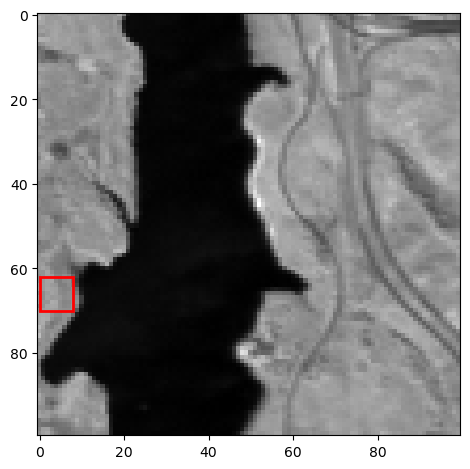

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Plot the matrix with imshow
img = plt.imshow(jasper_3d[80, :, :], cmap='gray')
# Add a rectangular box around the region of interest
# rect = patches.Rectangle((60, 0), 40, 50, linewidth=2, edgecolor='r', facecolor='none') # jasper_small
# rect = patches.Rectangle((30, 10), 10, 10, linewidth=2, edgecolor='r', facecolor='none') # jasper_small_2
rect = patches.Rectangle((0, 62), 8, 8, linewidth=2, edgecolor='r', facecolor='none') # jasper_small_5
plt.gca().add_patch(rect)
plt.tight_layout()

# Show the plot
plt.savefig('../../experimental/images/jasper_small_6/outlined_region.png')

In [6]:
# # jasper_3d[:, 10: 20, 30: 40] # jasper small 2
# # jasper_3d[:, 10: 20, 19: 29] # jasper small 3
# # jasper_small_3d = jasper_3d[:, 10: 20, 19: 29] # jasper small 4
# # jasper_small_3d = jasper_3d[:, 10: 20, 19: 29] # jasper small 4
# jasper_small_3d = jasper_3d[:, 62: 72, 6: 16] # jasper small 4
# jasper_small = jasper_small_3d.reshape(-1, 100, order='F')
# with open('../../experimental/datasets/jasper_small_5.npz', 'wb') as fp:
#     np.savez_compressed(fp, X=jasper_small)

In [7]:
jasper_small_3d = jasper_3d[:, 62: 70, 0: 8] # jasper small 6
M = jasper_small_3d.reshape(-1, 64, order='F')
m, n = M.shape

In [8]:
M.shape

(198, 64)

### vanilla NMF (r = 2)

In [9]:
r_true = 2
imgsize = (8, 8)
figsize = (16, 8)
fontsize = 10
num_rows = 1

ini_filepath = f'../../experimental/saved_models/jasper_small_6/r{r_true}_ini.npz'
save_filepath = f'../../experimental/saved_models/jasper_small_6/vanilla_r{r_true}_mit{max_iters}.npz'

In [10]:
if os.path.exists(ini_filepath):
    data = np.load(ini_filepath)
    ini_W = data['ini_W']
    ini_H = data['ini_H']
else:
    ini_W = np.random.rand(m, r_true)
    ini_H = np.random.rand(r_true, n)
    with open(ini_filepath, 'wb') as fout:
        np.savez_compressed(fout, ini_W=ini_W, ini_H=ini_H)

In [11]:
# if RUN:
#     model = NMF(n_components=r_true, init='custom', random_state=42, max_iter=max_iters)
#     W = model.fit_transform(X=M, W=ini_W.copy(), H=ini_H.copy())
#     H = model.components_
#     with open(save_filepath, 'wb') as fout:
#         np.savez_compressed(fout, W=W, H=H)
# else:
#     data2 = np.load(save_filepath)
#     W = data2['W']
#     H = data2['H']
#     img_filenames = [f'../../experimental/images/jasper_small_5/w_vanilla_r{r_true}_mit{max_iters}.png', f'../../experimental/images/jasper_small_5/seph_vanilla_r{r_true}_mit{max_iters}.png', f'../../experimental/images/jasper_small_5/combh_vanilla_r{r_true}_mit{max_iters}.png', f'../../experimental/images/jasper_small_6/r{r_true}_vanilla.png']
#     plot_and_merge(W, H, imgsize=imgsize, figsize=figsize, fontsize=fontsize, filenames=img_filenames, num_rows=num_rows, delete=True)

### vanilla NMF (r = n)

In [12]:
r = n
figsize = (32, 32)
num_rows = 8

ini_filepath = f'../../experimental/saved_models/jasper_small_6/r{r}_ini.npz'
save_filepath = f'../../experimental/saved_models/jasper_small_6/vanilla_r{r}_mit{max_iters}.npz'

In [13]:
if os.path.exists(ini_filepath):
    data = np.load(ini_filepath)
    ini_W = data['ini_W']
    ini_H = data['ini_H']
else:
    ini_W = np.random.rand(m, r)
    ini_H = np.random.rand(r, n)
    with open(ini_filepath, 'wb') as fout:
        np.savez_compressed(fout, ini_W=ini_W, ini_H=ini_H)

In [14]:
# if RUN:
#     model = NMF(n_components=r, init='custom', random_state=42, max_iter=max_iters)
#     W = model.fit_transform(X=M, W=ini_W.copy(), H=ini_H.copy())
#     H = model.components_
#     with open(save_filepath, 'wb') as fout:
#         np.savez_compressed(fout, W=W, H=H)
# else:
#     data2 = np.load(save_filepath)
#     W = data2['W']
#     H = data2['H']
#     img_filenames = [f'../../experimental/images/jasper_small_5/w_vanilla_r{r}_mit{max_iters}.png', f'../../experimental/images/jasper_small_5/seph_vanilla_r{r}_mit{max_iters}.png', f'../../experimental/images/jasper_small_5/combh_vanilla_r{r}_mit{max_iters}.png', f'../../experimental/images/jasper_small_6/r{r}_vanilla.png']
#     plot_and_merge(W, H, imgsize=imgsize, figsize=figsize, fontsize=fontsize, filenames=img_filenames, num_rows=num_rows, delete=True)

### nmf-son with random initialization

1200


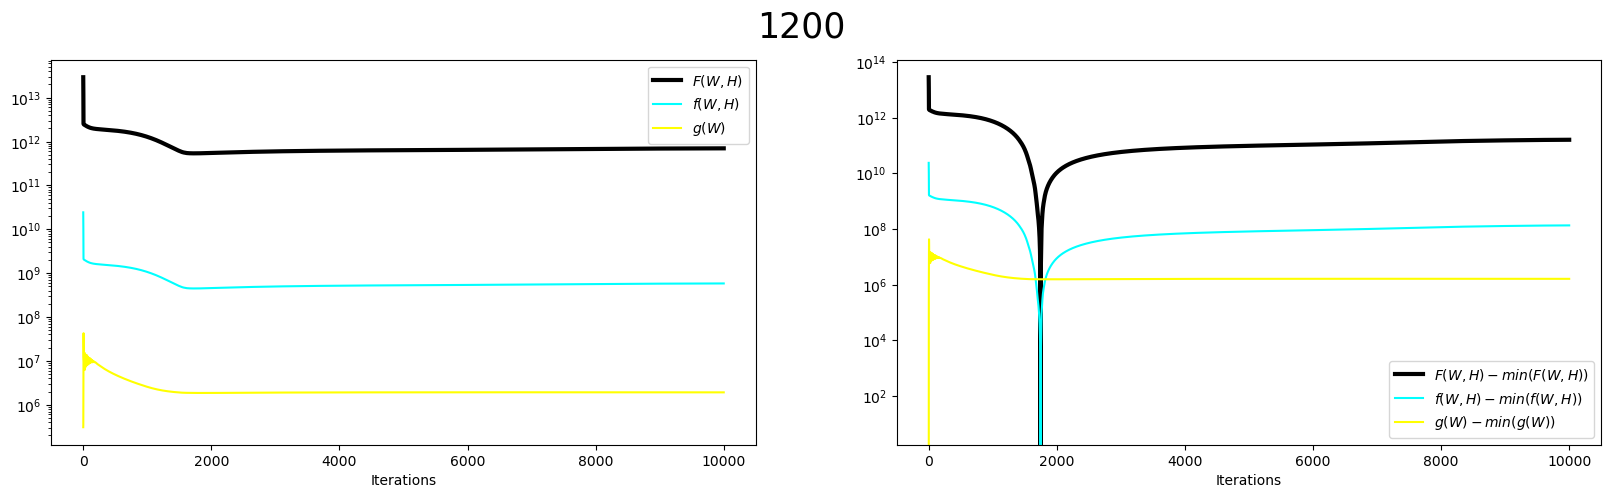

In [15]:
# lambda_vals = [200000, 100000, 50000, 10000, 1000, 100]
lambda_vals = [1200]
save_filepath = '../../experimental/saved_models/jasper_small_5/r{}_l{}_mit{}.npz'

for _lam in lambda_vals:
    if RUN:
        W, H, fscores, gscores, lvals = nmf_son_new(M, ini_W.copy(), ini_H.copy(), lam=_lam, itermax=max_iters, early_stop=EARLY_STOP, verbose=VERBOSE, scale_reg=SCALE_REG)
        save_results(save_filepath.format(r, _lam, max_iters), W, H, fscores, gscores, lvals)
    else:
        W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters))
        plot_scores(fscores, gscores, lvals, plot_title=_lam)

        img_filenames = [f'../../experimental/images/jasper_small_5/w_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/jasper_small_5/seph_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/jasper_small_5/combh_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/jasper_small_6/r{r}_l{_lam}_mit{max_iters}.png']
        plot_and_merge(W, H, imgsize=imgsize, figsize=figsize, fontsize=fontsize, filenames=img_filenames, num_rows=num_rows, delete=True)
    print(_lam)


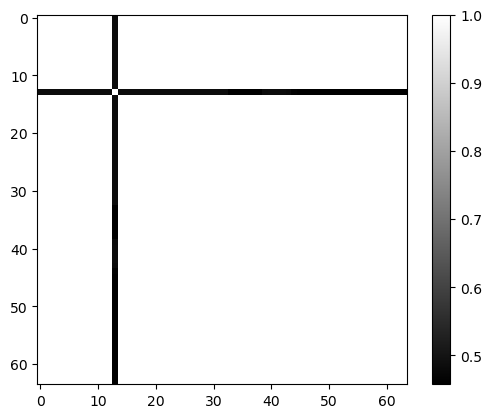

In [16]:
corr_matrix = np.corrcoef(W.T)

# Plot correlation matrix
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap='gray')
cbar = ax.figure.colorbar(im, ax=ax)
#
# # List rows with correlation below threshold
# threshold = 0.5
# below_threshold = []
# for i in range(W.shape[0]):
#     for j in range(i+1, W.shape[1]):
#         if abs(corr_matrix[i, j]) < threshold:
#             below_threshold.append((i, j))
#
# print(f"Rows with correlation below {threshold}: {below_threshold}")

In [17]:
unique_idxs = [13]
other_idxs = [x for x in range(r) if x not in unique_idxs]

In [18]:
# sum
hsum = H[other_idxs, :].sum(axis=0, keepdims=True)
wsum = W[:, other_idxs].sum(axis=1, keepdims=True)

new_W = np.hstack((W[:, unique_idxs], wsum))
new_H = np.vstack((H[unique_idxs, :], hsum))

In [19]:
img_filenames = [f'../../experimental/images/w_r{r}_l{_lam}_mit{max_iters}.png',
                 f'../../experimental/images/seph_r{r}_l{_lam}_mit{max_iters}.png',
                 f'../../experimental/images/combh_r{r}_l{_lam}_mit{max_iters}.png',
                 f'../../experimental/images/r{r}_l{_lam}_mit{max_iters}_reduced.png']
plot_and_merge(new_W, new_H, imgsize=imgsize, figsize=(6,3), fontsize=fontsize, filenames=img_filenames, num_rows=1, delete=False)

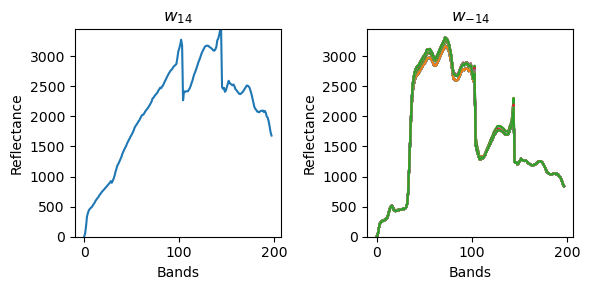

In [20]:
wmin, wmax = np.min(W), np.max(W)


fig, axs = plt.subplots(1, 2, figsize=(6,3))
axs = axs.ravel()


for cnt, ax in enumerate(axs):
    ax.set_xlabel('Bands')
    ax.set_ylabel('Reflectance')
    ax.set_ylim([min(0, wmin), wmax])


axs[0].plot(W[:, unique_idxs])
axs[0].set_title('$w_{{14}}$')

axs[1].plot(W[:, other_idxs])
axs[1].set_title('$w_{{-14}}$')

# Adjust layout and display plot
plt.tight_layout()
plt.savefig(f'../../experimental/images/r{r}_l{_lam}_mit{max_iters}_overlapped.png')